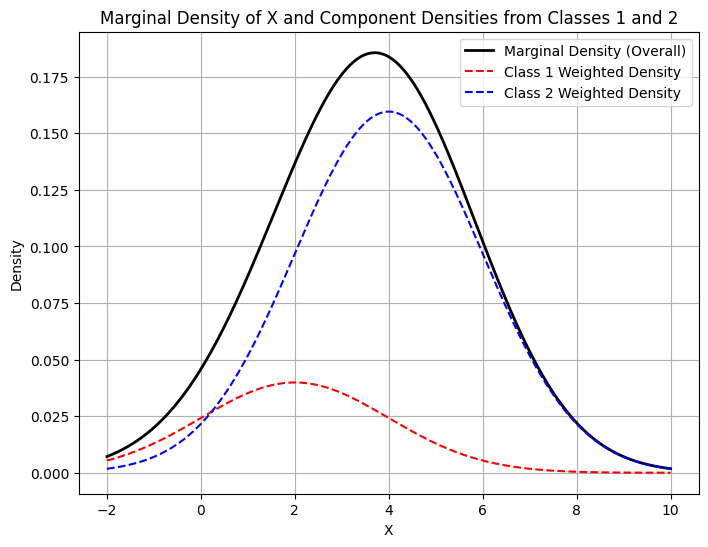

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mean1, var1, prob1 = 2, 4, 0.2
mean2, var2, prob2 = 4, 4, 0.8
std1, std2 = np.sqrt(var1), np.sqrt(var2)

# X range for plotting
x = np.linspace(-2, 10, 1000)

# Component densities
density_class1 = prob1 * norm.pdf(x, mean1, std1)
density_class2 = prob2 * norm.pdf(x, mean2, std2)

# Overall marginal density
density_marginal = density_class1 + density_class2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, density_marginal, label="Marginal Density (Overall)", color='black', lw=2)
plt.plot(x, density_class1, label="Class 1 Weighted Density", color='red', linestyle='--')
plt.plot(x, density_class2, label="Class 2 Weighted Density", color='blue', linestyle='--')

# Labels and title
plt.title("Marginal Density of X and Component Densities from Classes 1 and 2")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


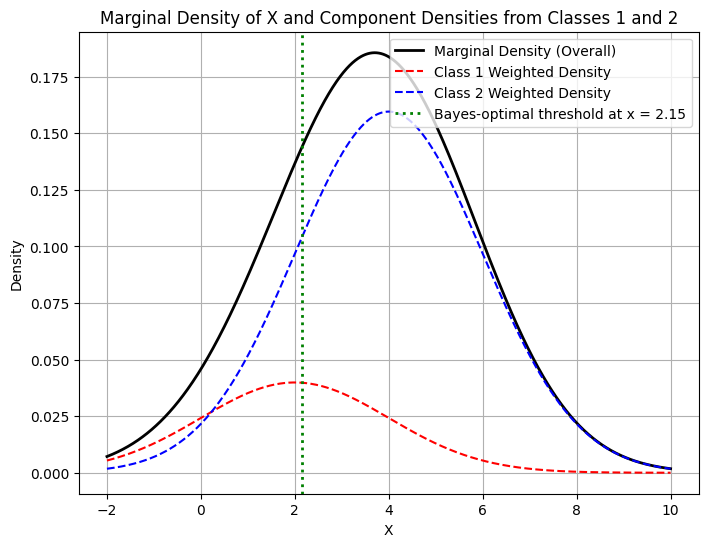

np.float64(2.151607518506813)

In [2]:
# Calculation of the intercept
intercept = 4 - (8 / 3) * np.log(2)

# Plotting with the intercept
plt.figure(figsize=(8, 6))
plt.plot(x, density_marginal, label="Marginal Density (Overall)", color='black', lw=2)
plt.plot(x, density_class1, label="Class 1 Weighted Density", color='red', linestyle='--')
plt.plot(x, density_class2, label="Class 2 Weighted Density", color='blue', linestyle='--')

# Marking the intercept
plt.axvline(intercept, color='green', linestyle=':', lw=2, label=f'Bayes-optimal threshold at x = {intercept:.2f}')

# Labels and title
plt.title("Marginal Density of X and Component Densities from Classes 1 and 2")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Return the calculated intercept
intercept


In [5]:
from scipy.stats import norm
mean, std = 4, np.sqrt(4)  # N(2, 4)
x_value = 0.227
cdf_value = norm.cdf(x_value, mean, std)
print(cdf_value)


0.029613804203637562


In [6]:
print(0.2 * 0.812 + 0.8 * 0.0296)

0.18608000000000002


In [7]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 1000

# Class labels (Y)
Y = np.random.choice([1, 2], size=n, p=[0.2, 0.8])

# Generate X values based on class labels
X = np.where(Y == 1, np.random.normal(2, np.sqrt(4), size=n), np.random.normal(4, np.sqrt(4), size=n))

# Combine X and Y into a dataset
import pandas as pd
data = pd.DataFrame({'X': X, 'Y': Y})

# Display a preview of the generated data
print(data.head())


          X  Y
0  1.187365  2
1  3.833789  2
2  0.990559  2
3  5.520112  2
4  3.119581  1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=42)

# Fit a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, Y_train)


LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the test set
Y_pred = clf.predict(X_test)

# Calculate overall accuracy and error rate
accuracy = accuracy_score(Y_test, Y_pred)
overall_error = 1 - accuracy

# Confusion matrix to calculate class-specific error rates
cm = confusion_matrix(Y_test, Y_pred)

# Class-specific error rates
error_class1 = cm[0, 1] / cm[0].sum()  # Misclassified Class 1 examples
error_class2 = cm[1, 0] / cm[1].sum()  # Misclassified Class 2 examples

# Print results
print(f"Overall Error Rate: {overall_error:.3f}")
print(f"Class 1 Error Rate: {error_class1:.3f}")
print(f"Class 2 Error Rate: {error_class2:.3f}")


Overall Error Rate: 0.215
Class 1 Error Rate: 0.854
Class 2 Error Rate: 0.013
